# CIFAR-10 Image Classification

This _standalone_ script serves as a practical **inference** tool, designed to utilize the model trained in the _**"CIFAR-10 Image Classification using Deep Convolutional Neural Networks.ipynb"**_ notebook. Its primary function is to load the pre-trained cifar10\_classifier\_model.keras model to classify any user-provided image, defaulting to images.jpeg in the same directory if no specific file is provided.

In [5]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import logging
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').setLevel(logging.ERROR)

print("Libraries imported successfully.")

Libraries imported successfully.


In [6]:
MODEL_PATH = 'cifar10_classifier_model.keras'
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
IMAGE_SIZE = (32, 32)

IMAGE_TO_CLASSIFY = 'images.jpg'

In [7]:
def process_and_predict(image_path: str, model: tf.keras.Model) -> list | None:
    """
    Loads, preprocesses, and classifies a single image.
    """
    if not os.path.exists(image_path):
        print(f"[ERROR] Image file not found at: {image_path}")
        return None, None

    try:
        img = Image.open(image_path).convert('RGB')
        img_resized = img.resize(IMAGE_SIZE)
        img_array = np.array(img_resized) / 255.0
        img_batch = np.expand_dims(img_array, axis=0)

        predictions = model.predict(img_batch, verbose=0)
        scores = tf.nn.softmax(predictions[0])

        results = sorted(
            [(CLASS_NAMES[i], float(score)) for i, score in enumerate(scores)],
            key=lambda x: x[1],
            reverse=True
        )
        return img, results

    except Exception as e:
        print(f"[ERROR] An error occurred during image processing or prediction: {e}")
        return None, None

Loading model: cifar10_classifier_model.keras
Model loaded successfully.


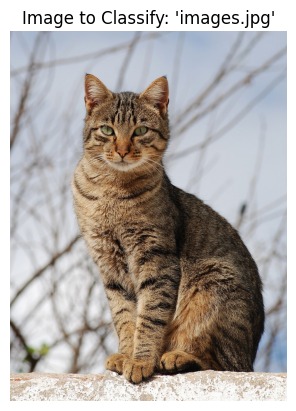


--- Classification Results ---
  - cat          | Confidence: 82.12%
  - frog         | Confidence: 8.95%
  - deer         | Confidence: 4.60%
----------------------------


In [8]:
if not os.path.exists(MODEL_PATH):
    print(f"[ERROR] Model file not found. Please ensure '{MODEL_PATH}' is in the same directory.")
else:
    print(f"Loading model: {MODEL_PATH}")
    model = tf.keras.models.load_model(MODEL_PATH)
    print("Model loaded successfully.")

    original_image, predictions = process_and_predict(IMAGE_TO_CLASSIFY, model)

    if predictions:
        plt.imshow(original_image)
        plt.title(f"Image to Classify: '{IMAGE_TO_CLASSIFY}'")
        plt.axis('off')
        plt.show()

        print(f"\n--- Classification Results ---")
        for class_name, probability in predictions[:3]:
            print(f"  - {class_name:<12} | Confidence: {probability:.2%}")
        print("----------------------------")